## BI Lab 4

### Task1: Descriptive Analysis, Unsupervised Learning – IKEA

**Task**:  to discover some new places here in Sweden that may be suitable for IKEA department stores. <br>
```
We will do this by using the k-means method on a text file, 
*ikea_data.txt*, which contains important features for many of Sweden’s municipalities.
```


**PCA (Principal Components Analysis)** is particularly handy when working with big data sets, where many variables are present.
Because as such you cannot easily plot the data in its raw format, PCA allows you to see the overall shape of the data, identifying similaritites and differences between groups of samples. 

**In a nutshell**,<br>
[source](https://www.datacamp.com/community/tutorials/pca-analysis-r)

We take a dataset with many variables, and you simplify that dataset by turning your original variables into a smaller number of "Principal Components".

Principal Components are the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out. This means that we try to find the straight line that best spreads the data out when it is projected along it. This is the **first principal component**, the straight line that shows the most substantial variance in the data.<br>

**Eigenvectors**, and **eigenvalues** come in pairs: every eigenvector has a corresponding eigenvalue. An eigenvector is basically a direction, such as "vertical" or "45 degrees", while an eigenvalue is a number telling you how much variance there is in the data in that direction. The *eigenvector with the highest eigenvalue* is the first principal component*.

In [2]:
install.packages("data.table")
install.packages("psych")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(data.table)

In [4]:
# LOAD DATA ################################################
# creating a dataframe from the pricing dataset
#data_pricing <- read.csv("home_assignment_data_pricing.csv")
ikea <- fread("ikea_data.txt")
#data_pricing <- fread("home_assignment_data_pricing.csv")

In [5]:
ikea_df <- as.data.frame(ikea)

head(ikea,3)

Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2583,2010,Haparanda,1078,276,10059,719,0.07147828,195.7417,111.0758,0,1
880,2010,Kalmar,3790,1621,62815,8716,0.13875667,117.1736,390.5169,0,0
1780,2010,Karlstad,4560,1910,85753,13308,0.15518991,119.6479,469.8567,0,0


## Explore the dataframe

1. Clean the dataset/Check data types.

In [6]:
# EXPLORE DATA ################################################
# Using head or tail to look at part of it, 6 first lines by default
# here the first 3 lines

head(ikea,3)
#tail(data_pricing,3)

Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2583,2010,Haparanda,1078,276,10059,719,0.07147828,195.7417,111.0758,0,1
880,2010,Kalmar,3790,1621,62815,8716,0.13875667,117.1736,390.5169,0,0
1780,2010,Karlstad,4560,1910,85753,13308,0.15518991,119.6479,469.8567,0,0


In [ ]:
# Check the dimension, nrow x ncol
# 2612522 rows and 14 columns
dim(ikea)

[1] 207  12

In [ ]:
summary(ikea)

  Kommun_code          Year      Kommun_name           Revenue       
 Min.   : 114.0   Min.   :2010   Length:207         Min.   :   11.0  
 1st Qu.: 582.5   1st Qu.:2010   Class :character   1st Qu.:  110.0  
 Median :1263.0   Median :2010   Mode  :character   Median :  252.0  
 Mean   :1049.7   Mean   :2010                      Mean   : 1031.8  
 3rd Qu.:1461.5   3rd Qu.:2010                      3rd Qu.:  825.5  
 Max.   :2583.0   Max.   :2010                      Max.   :32897.0  
    Employee         Population     Population_University Percent_University
 Min.   :    2.0   Min.   :  3672   Min.   :   174.0      Min.   :0.04614   
 1st Qu.:   64.5   1st Qu.: 10786   1st Qu.:   788.5      1st Qu.:0.06902   
 Median :  142.0   Median : 16515   Median :  1598.0      Median :0.08660   
 Mean   :  523.0   Mean   : 34543   Mean   :  4660.1      Mean   :0.09746   
 3rd Qu.:  435.0   3rd Qu.: 37922   3rd Qu.:  4073.5      3rd Qu.:0.11208   
 Max.   :18795.0   Max.   :847073   Max.   :1915

In [7]:
#clean data from NAs if any
ikea_clean = na.omit(ikea)

In [9]:
library(psych)

describe(ikea)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Kommun_code,1,207,1.049734e+03,5.410655e+02,1.263000e+03,1.061874e+03,6.360354e+02,1.140000e+02,2.583000e+03,2.469000e+03,-0.220657,-0.9763496,3.760665e+01
Year,2,207,2.010000e+03,0.000000e+00,2.010000e+03,2.010000e+03,0.000000e+00,2.010000e+03,2.010000e+03,0.000000e+00,NaN,NaN,0.000000e+00
Kommun_name*,3,207,1.040000e+02,5.989992e+01,1.040000e+02,1.040000e+02,7.709520e+01,1.000000e+00,2.070000e+02,2.060000e+02,0.000000,-1.2174048,4.163332e+00
Revenue,4,207,1.031802e+03,2.694890e+03,2.520000e+02,5.187365e+02,2.920722e+02,1.100000e+01,3.289700e+04,3.288600e+04,8.510641,92.9331432,1.873078e+02
Employee,5,207,5.230386e+02,1.463194e+03,1.420000e+02,2.737425e+02,1.541904e+02,2.000000e+00,1.879500e+04,1.879300e+04,9.776177,115.5191122,1.016990e+02
Population,6,207,3.454340e+04,6.688250e+04,1.651500e+04,2.358901e+04,1.206836e+04,3.672000e+03,8.470730e+05,8.434010e+05,9.127256,103.7461159,4.648655e+03
Population_University,7,207,4.660106e+03,1.440350e+04,1.598000e+03,2.465820e+03,1.516700e+03,1.740000e+02,1.915850e+05,1.914110e+05,10.839537,134.7831559,1.001112e+03
Percent_University,8,207,9.746109e-02,4.075996e-02,8.660131e-02,9.124870e-02,3.065747e-02,4.614161e-02,2.696457e-01,2.235041e-01,1.676290,3.3249064,2.833013e-03
Productivity,9,207,9.145400e+01,2.796087e+01,9.045705e+01,9.035611e+01,2.200508e+01,1.989888e+01,2.756363e+02,2.557374e+02,1.619456,9.2835603,1.943415e+00


In [78]:
ikea_clean = as.data.frame(gsub("[[:punct:]]", "", as.matrix(ikea)))

tail(ikea_clean)

Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 3 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. try

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
202,1862,2010,Degerfors,56,27,9641,483,005009854,10394367,5770170,0,0
203,1863,2010,Hllefors,52,33,7220,368,005096953,7897019,5358015,0,0
204,1864,2010,Ljusnarsberg,51,24,4931,266,005394443,10649585,5254976,0,0
205,1880,2010,rebro,6228,2995,135460,19516,014407205,10421387,641725346,0,0
206,1881,2010,Kumla,152,98,20456,1598,007811889,7773047,15661890,0,0
207,1882,2010,Askersund,126,65,11278,809,007173258,9714735,12982883,0,0


In [ ]:
head(ikea_clean,3)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2583,2010,Haparanda,1078,276,10059,719,007147828,19574174,111075774,0,1
2,880,2010,Kalmar,3790,1621,62815,8716,013875667,11717365,390516869,0,0
3,1780,2010,Karlstad,4560,1910,85753,13308,015518991,11964794,469856708,0,0


In [ ]:
#save in a csv file
write.csv(ikea_clean, "ikea_clean.csv")

2. Perform PCA for dimensionality reduction (explain 90-95% of total variance)

PCA is a type of **linear transformation** on a given data set that has values for a certain number of variables (coordinates) for a certain amount of spaces. This linear transformation fits this dataset to a new coordinate system in such a way that the most significant variance is found on the first coordinate, and each subsequent coordinate is orthogonal to the last and has a lesser variance. In this way, you transform a set of x correlated variables over y samples to a set of p uncorrelated principal components over the same samples.

In [79]:
# convert specific columns with numbers into int type
#samp <- c("Revenue",	"Employee", "Population", "Population_University", "Percent_University", "Productivity", "SalesIndex")
#ikea_clean <- as.numeric(ikea_clean[, samp])

ikea_clean$Revenue <- as.numeric(ikea_clean$Revenue)
ikea_clean$Employee <- as.numeric(ikea_clean$Employee)
ikea_clean$Population <- as.numeric(ikea_clean$Population)
ikea_clean$Population_University <- as.numeric(ikea_clean$Population_University)
ikea_clean$Percent_University <- as.numeric(ikea_clean$Percent_University)
ikea_clean$Productivity <- as.numeric(ikea_clean$Productivity)
ikea_clean$SalesIndex <- as.numeric(ikea_clean$SalesIndex)

In [17]:
tail(ikea_clean, 3)

Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 3 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         st

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
205,1880,2010,rebro,6228,2995,135460,19516,14407205,10421387,641725346,0,0
206,1881,2010,Kumla,152,98,20456,1598,7811889,7773047,15661890,0,0
207,1882,2010,Askersund,126,65,11278,809,7173258,9714735,12982883,0,0


Let's replace indexes with Kommun_name instead

In [60]:
#rownames(ikea_clean) <- ikea_clean$Kommun_name

In [80]:
# exclude categorical data / textual
## subset the dataset keeping only numerical data

samp <- c("Revenue",	"Employee", "Population", "Population_University", "Percent_University", "Productivity", "SalesIndex")
z <- ikea_clean[, samp]

#ikea_clean.pca <- prcomp(ikea_clean[,c(4:10)], center = TRUE,scale. = TRUE)
z.pca <- prcomp(z, center = TRUE,scale. = TRUE)

In [62]:
summary(ikea_clean.pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6       PC7
Standard deviation     2.278 0.9951 0.8662 0.23238 0.11852 0.06641 7.078e-10
Proportion of Variance 0.741 0.1415 0.1072 0.00771 0.00201 0.00063 0.000e+00
Cumulative Proportion  0.741 0.8825 0.9897 0.99736 0.99937 1.00000 1.000e+00

We obtain 7 principal components called PC1-7. Each of these explains a percentage of the total variation in the dataset. <br>
PC1 explains 74% of the total variance, which means that nearly three-fourths of the information in this dataset subset made of 7 variables can be encapsulated by just that one Principal Component. PC2 explains 14% of the variance. So, by knowing the position of a sample in relation to just PC1 and PC2, we can get a very accurate view on where the sample stands in relation to other samples, considering that PC1 and PC2 alone can explain 88% of the variance.

In [63]:
# Let's have a look at our PCA object with a str() call
str(z.pca)

List of 5
 $ sdev    : num [1:7] 2.278 0.995 0.866 0.232 0.119 ...
 $ rotation: num [1:7, 1:7] -0.435 -0.434 -0.434 -0.43 -0.238 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "Revenue" "Employee" "Population" "Population_University" ...
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:7] 1032 523 34543 4660 9746109 ...
  ..- attr(*, "names")= chr [1:7] "Revenue" "Employee" "Population" "Population_University" ...
 $ scale   : Named num [1:7] 2695 1463 66882 14403 4075996 ...
  ..- attr(*, "names")= chr [1:7] "Revenue" "Employee" "Population" "Population_University" ...
 $ x       : num [1:207, 1:7] 0.256 -1.818 -2.539 -0.285 0.291 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:207] "Haparanda" "Kalmar" "Karlstad" "Upplands V\xe4sby" ...
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


Our PCA object contains the following information:

* The center point (*center*), scaling (*scale*), standard deviation(sdev) of each principal component
* The relationship (correlation or anticorrelation, etc) between the initial variables and the principal components (*rotation*)
* The values of each sample in terms of the principal components (*x*)

In [69]:
head(z,3)

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
Haparanda,0.01714284,-0.1688351,-0.3660808,-0.2736215,-0.6374592,3.7297749,0.01714284
Kalmar,1.02349206,0.7503865,0.4227056,0.2815909,1.0131408,0.9198444,1.02349206
Karlstad,1.30921806,0.9478996,0.7656652,0.6004024,1.4163119,1.0083356,1.30921806


#### Normalize or scale data

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [81]:
dim(z)

[1] 207   7

In [82]:
# Normalization
m <- apply(z, 2, mean)

s <- apply(z, 2, sd)

z <- scale(z, m, s)

# Calculate the Euclidean distance
distance <- dist(z)

In [43]:
# plot dendrogram

install.packages("data.tree")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



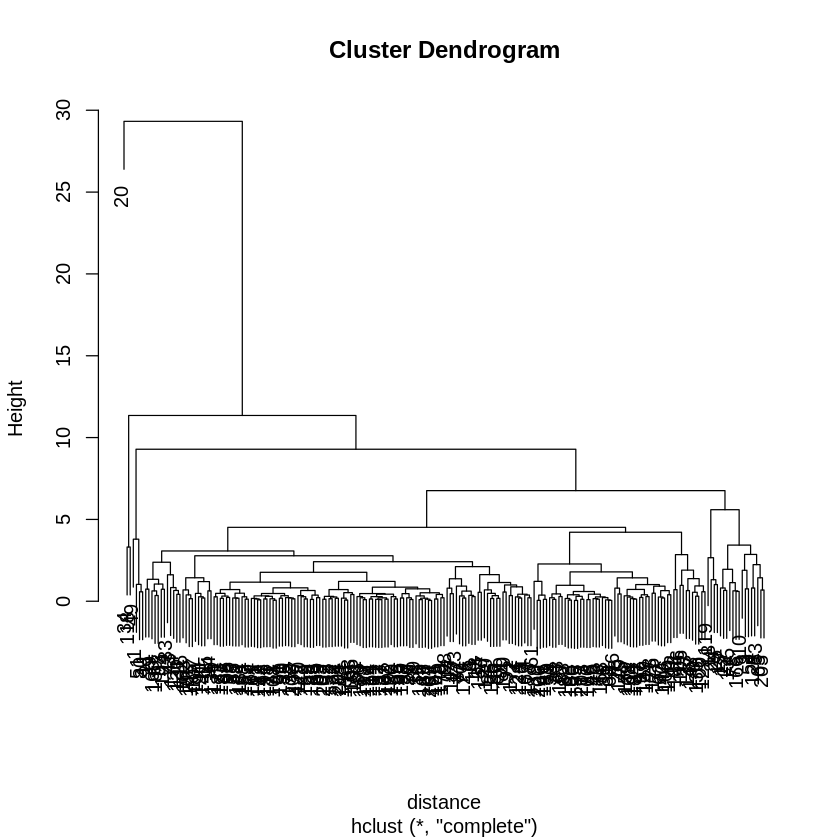

In [84]:
library(data.tree)

#png(file="dendogram2.png",
#width=900, height=600)

hc.l <- hclust(distance)
plot(hc.l)

In [24]:
# Plotting PCA with ggbiplot
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis




plyr (NA -> 1.8.6) [CRAN]


Installing 1 packages: plyr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmpgh6kUa/remotes3b4b782a1f/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



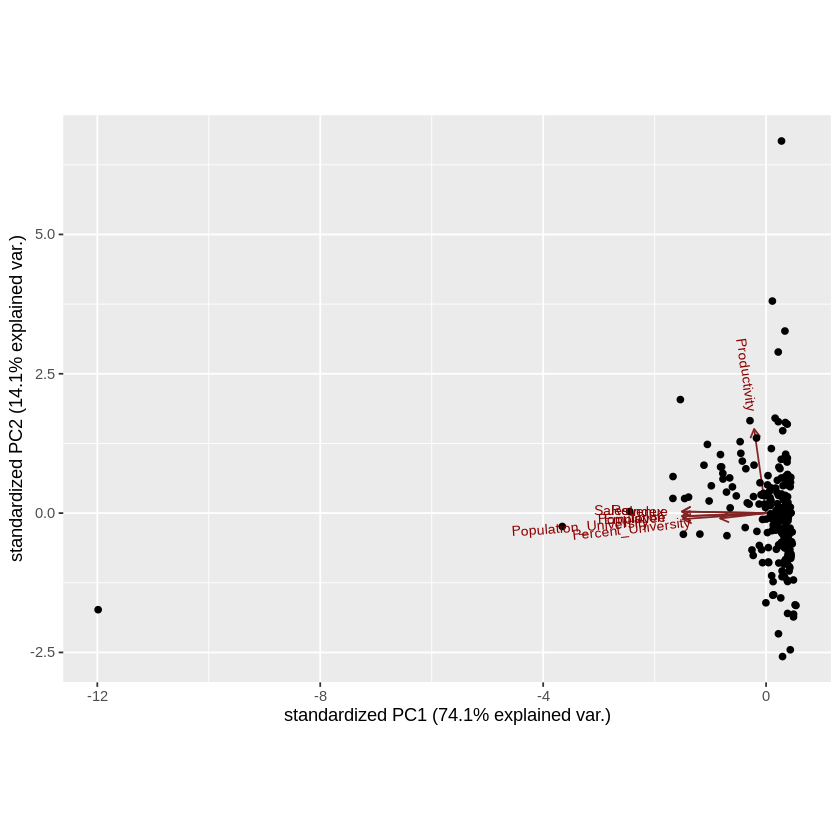

In [85]:
library(ggbiplot)

ggbiplot(z.pca)

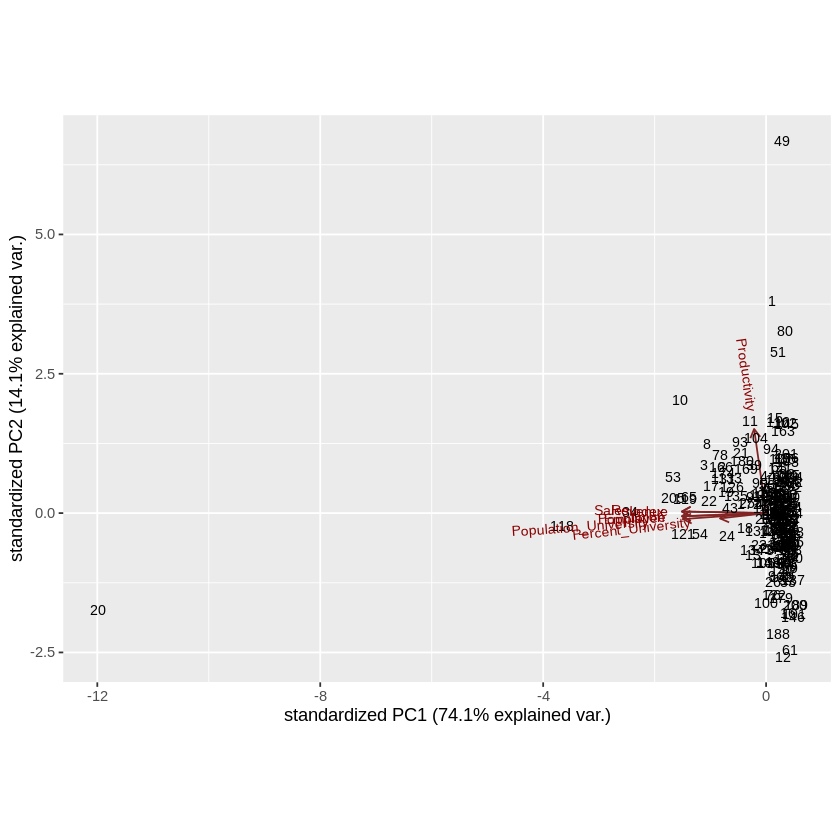

In [86]:
ggbiplot(z.pca, labels=rownames(ikea_clean))

We can see that the variables Population, Percent_university, SalesIndexes contribute the least to PC1 (because placed in the lowest quadrant at bottom left) -- as opposed to the influence thatt variables in the upper right quadrant would have had with higher values in those variables moving the samples to the right on this plot.<br>
This lets you see how the data points relate to the axes, but the plot is not very informative without knowing which point corresponds to which sample.

Thus what represents the data with index 20 for eg.?

In [58]:
ikea_clean[20,]

# Stockholm

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
20,180,2010,Stockholm,32897,18795,847073,191585,22617295,8771780,3389665819,1,0


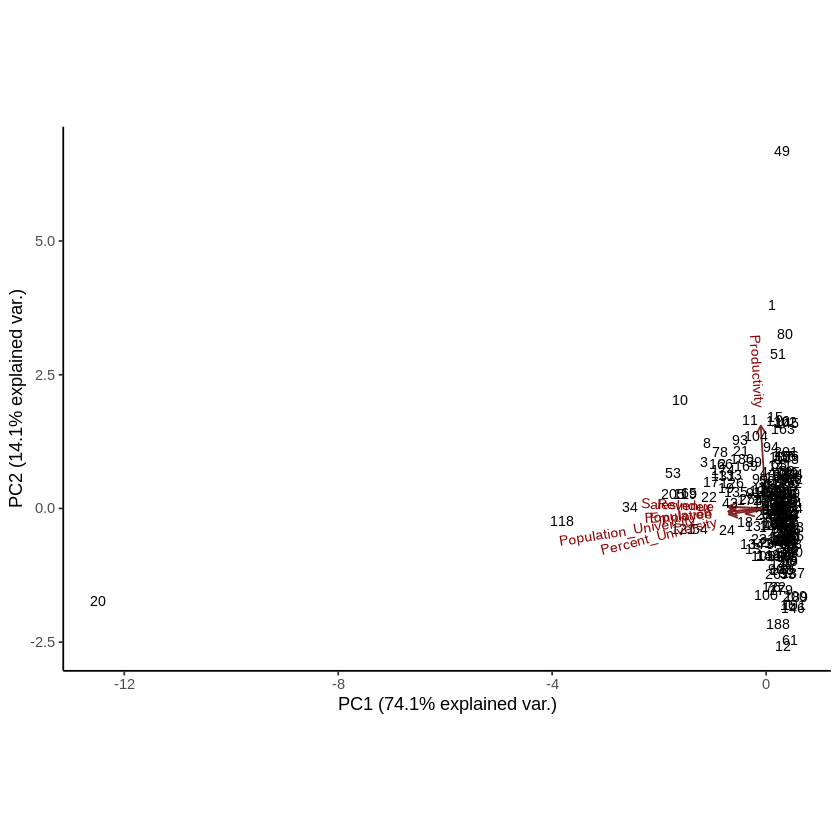

In [94]:
ggbiplot(ikea_clean.pca,ellipse=TRUE,obs.scale = 0.05, var.scale = 0.05,  labels=rownames(ikea_clean))+
  theme_classic()

3. Apply Elbow method to select optimum number of clusters - would turn out to be 3


In [103]:
install.packages("purrr")

library(purrr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘purrr’


The following object is masked from ‘package:scales’:

    discard


The following object is masked from ‘package:plyr’:

    compact


The following object is masked from ‘package:data.table’:

    transpose




In [104]:
# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = z, centers = k)
  model$tot.withinss
})

In [106]:
# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)


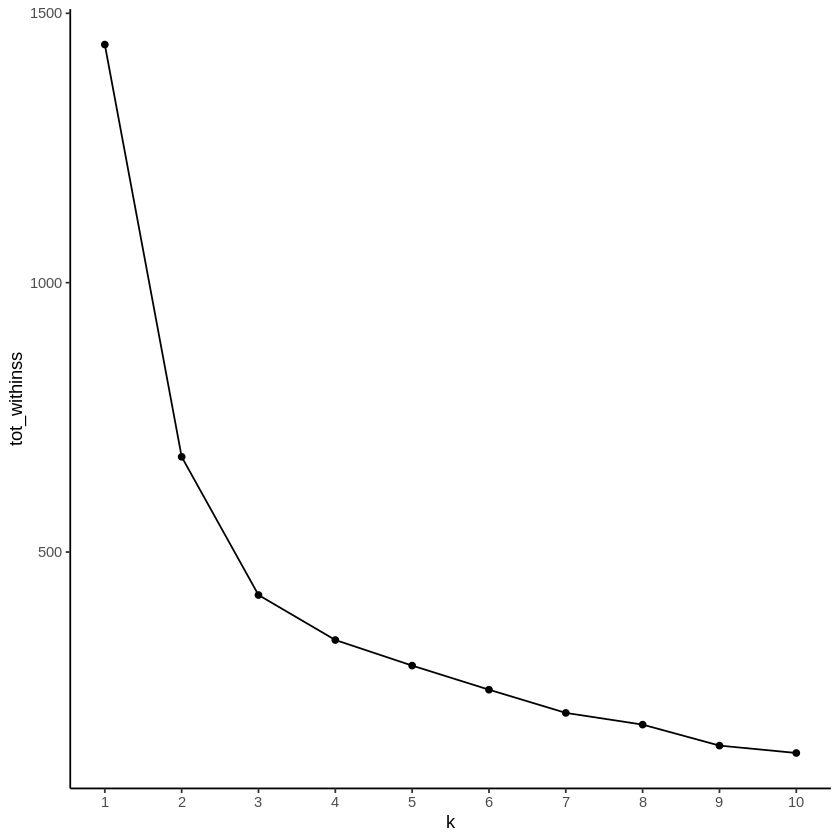

In [107]:
# Plot the elbow plot
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line() + 
  geom_point()+
  theme_classic() +
  scale_x_continuous(breaks = 1:10)

#### Alternative vizualisations

In [110]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘NBClust’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘NbClust’ ?”


In [112]:
install.packages("NbClust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [113]:
library(factoextra)
library(NbClust)

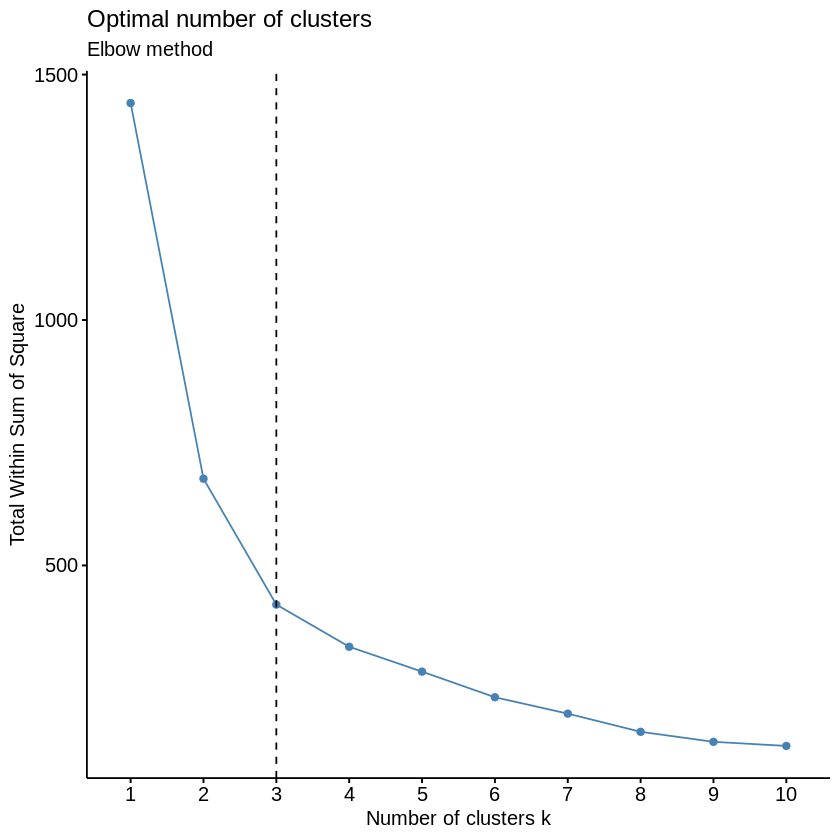

In [115]:
# z = scaled data
# Elbow method
fviz_nbclust(z, kmeans, method = "wss") +
  geom_vline(xintercept = 3, linetype = 2)+
  labs(subtitle = "Elbow method")


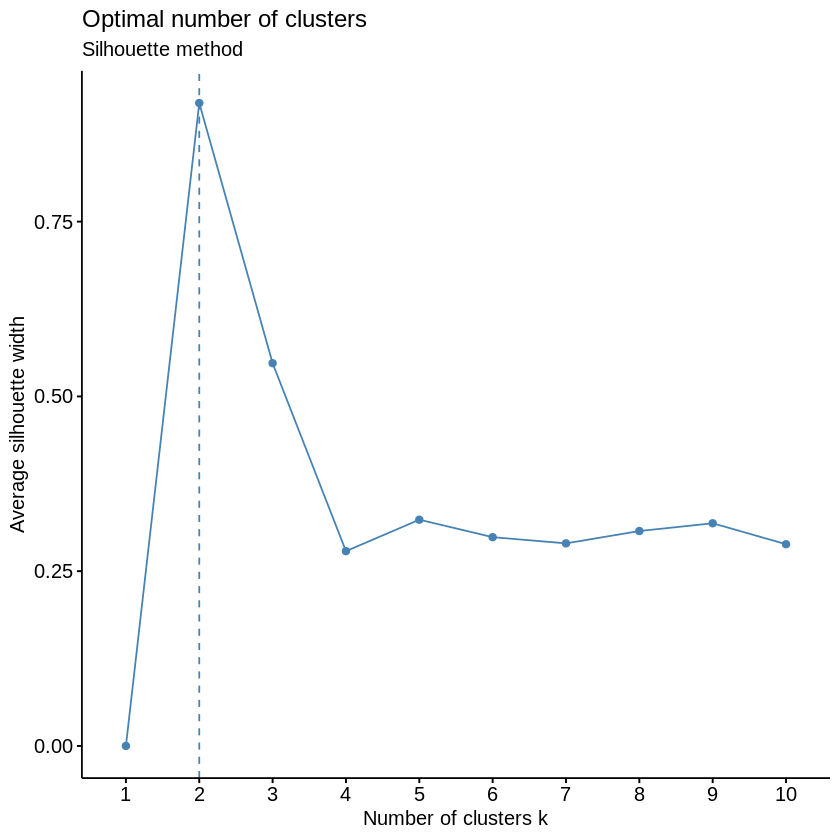

In [116]:

# Silhouette method
fviz_nbclust(z, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")


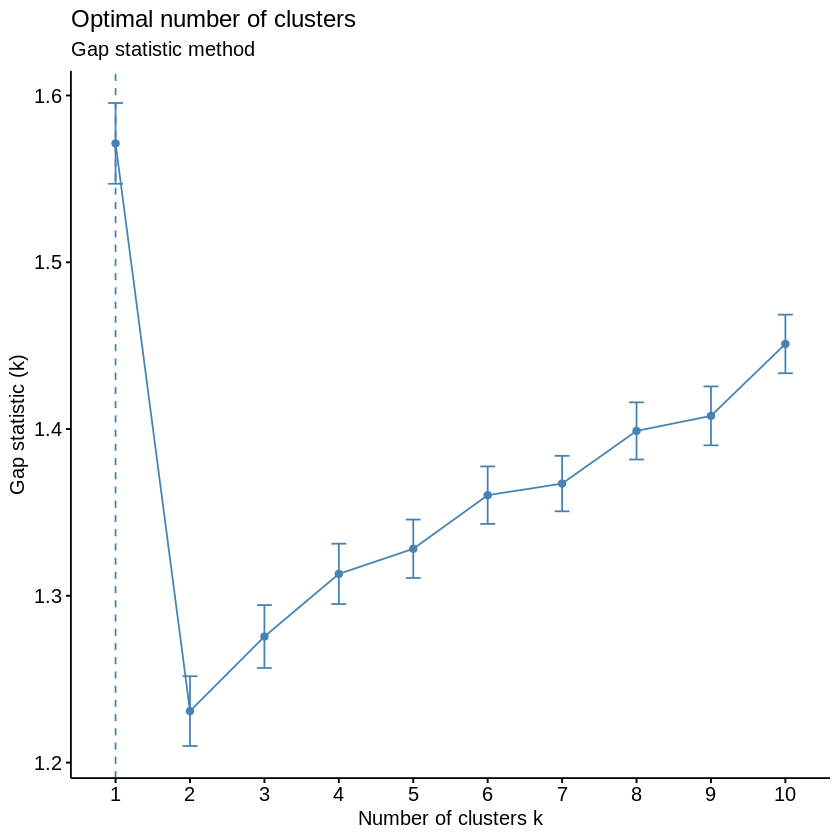

In [117]:

# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
set.seed(123)
fviz_nbclust(z, kmeans, nstart = 25,  method = "gap_stat", nboot = 50)+
  labs(subtitle = "Gap statistic method")

#### K-Means clustering

In [97]:
install.packages("fpc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




In [99]:
# K-Means Clustering with 3 clusters
fit <- kmeans(z, 3)

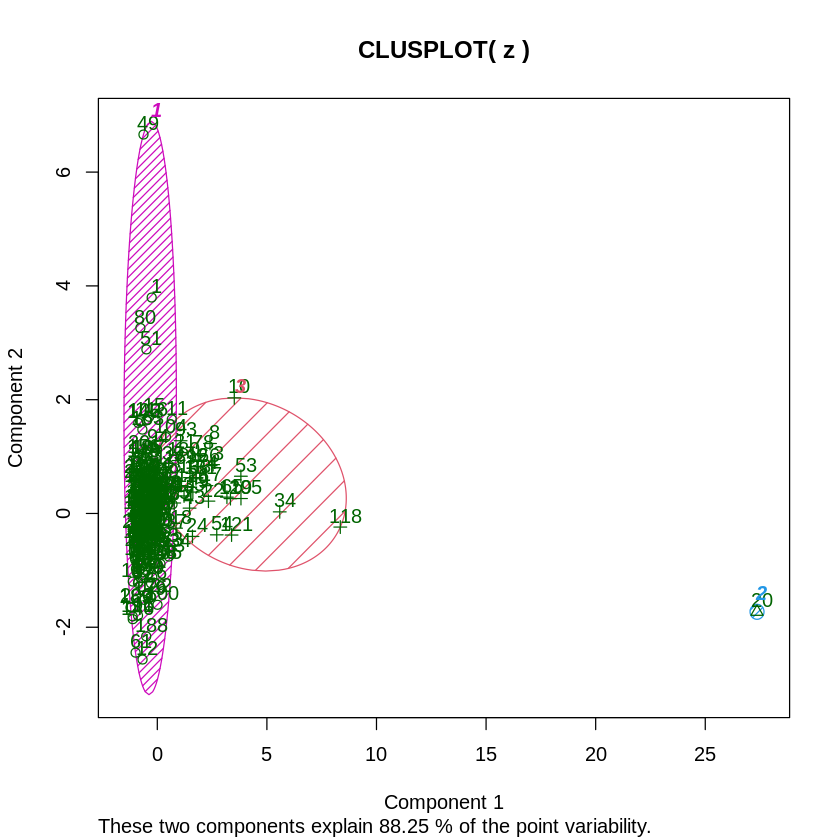

In [109]:
# Cluster Plot against 1st 2 principal components

# vary parameters for most readable graph
library(cluster)

clusplot(z, fit$cluster, color=TRUE, shade=TRUE,
   labels=2, lines=0)


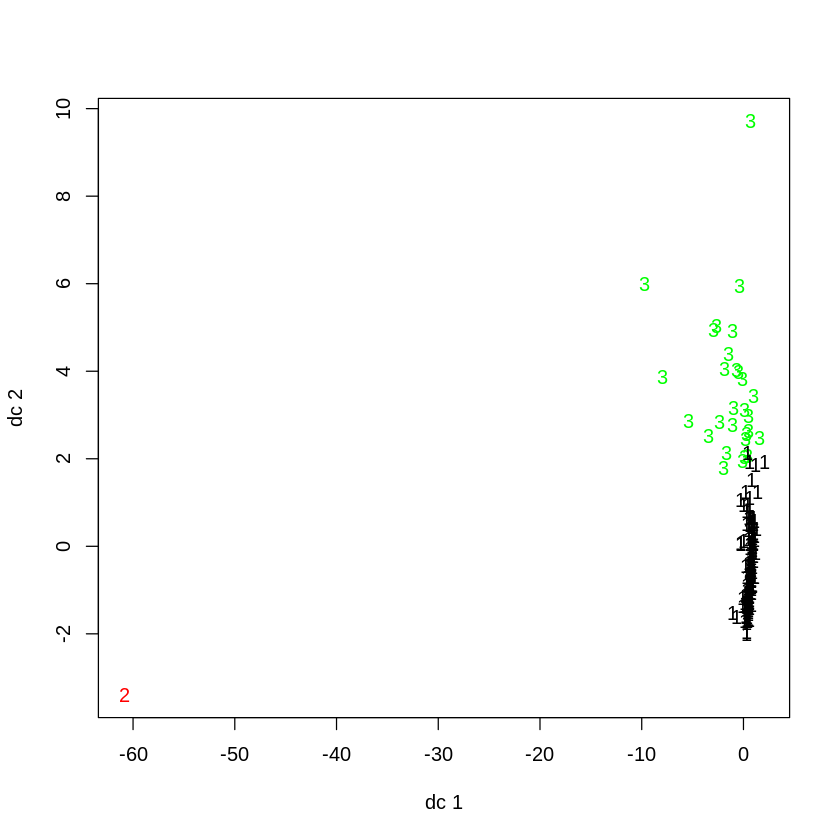

In [101]:
# Centroid Plot against 1st 2 discriminant functions
library(fpc)

plotcluster(z, fit$cluster)

In [118]:
tail(fit,3)

$size
[1] 177   1  29

$iter
[1] 3

$ifault
[1] 0

In [119]:
summary(fit)

             Length Class  Mode   
cluster      207    -none- numeric
centers       21    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

#### Append column clusters to original df

In [ ]:
# To demonstrate why we can remove this outliers
# Compute mahalonobis distance and flag outliers if any
# [source](https://www.youtube.com/watch?v=BdEOIQ2ozYM&t=223s)

# First, let's calculate mahalanobis distance with height and weight distribution
# let's select price and year columns
Sx <- cov(sub_xbox360[, c(4,8)])
MD <- mahalanobis(sub_xbox360[, c(4,8)], colMeans(sub_xbox360[, c(4,8)]), Sx)


In [ ]:
Sx <- cov(xbox360_911420_sub[, c(4,8)])
MD <- mahalanobis(xbox360_911420_sub[, c(4,8)], colMeans(xbox360_911420_sub[, c(4,8)]), Sx)


In [ ]:
# covariance matrix for price and year, with the variances in its diagonal
Sx

,price,year
price,8752.87861,-18.781293
year,-18.78129,1.272325


In [ ]:
# covariance matrix for price and number of store per product per day
Sx1 <- cov(xbox360_911420_sub[, c(4,12)])
MD1 <- mahalanobis(xbox360_911420_sub[, c(4,12)], colMeans(xbox360_911420_sub[, c(4,12)]), Sx1)

In [ ]:
Sx1

,price,number_of_store_per_product_and_day
price,8752.87861,-48.00986
number_of_store_per_product_and_day,-48.00986,23.32179


In [ ]:
install.packages("pcaPP", repo="http://cran.r-project.org", dep=T)
library(pcaPP)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mvtnorm’




ERROR: ignored

Warning message in if (class(cov1) == "matrix") cm1 = cov1 else if (is.null(cov1$cov)) stop("No appropriate covariance structure specified") else {:
“the condition has length > 1 and only the first element will be used”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“supplied color is neither numeric nor character”


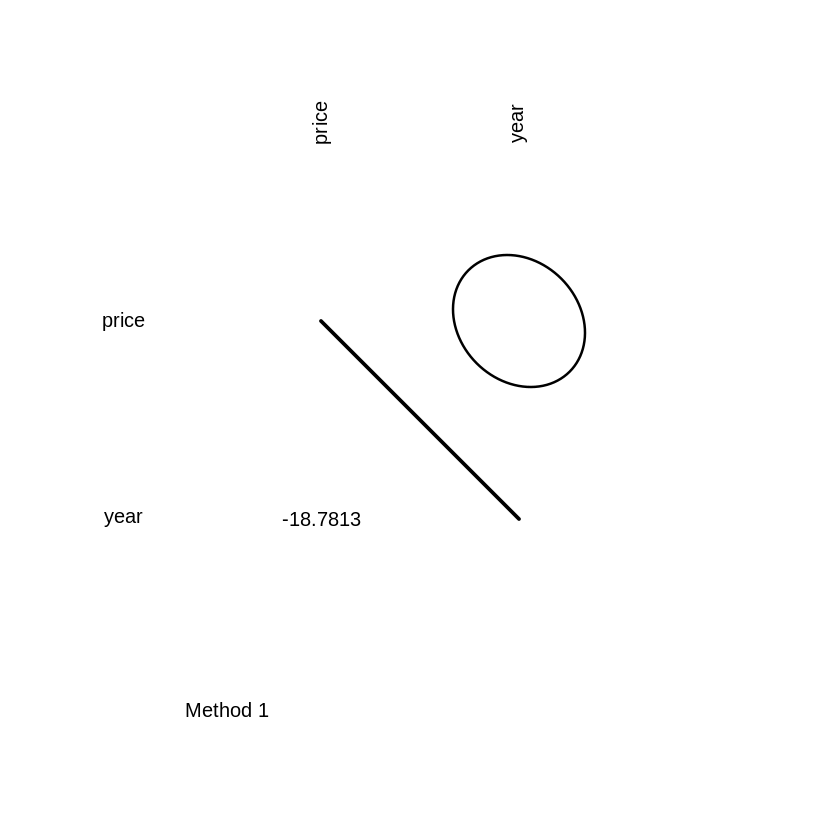

In [ ]:
plotcov(Sx)

Warning message in if (class(cov1) == "matrix") cm1 = cov1 else if (is.null(cov1$cov)) stop("No appropriate covariance structure specified") else {:
“the condition has length > 1 and only the first element will be used”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“supplied color is neither numeric nor character”


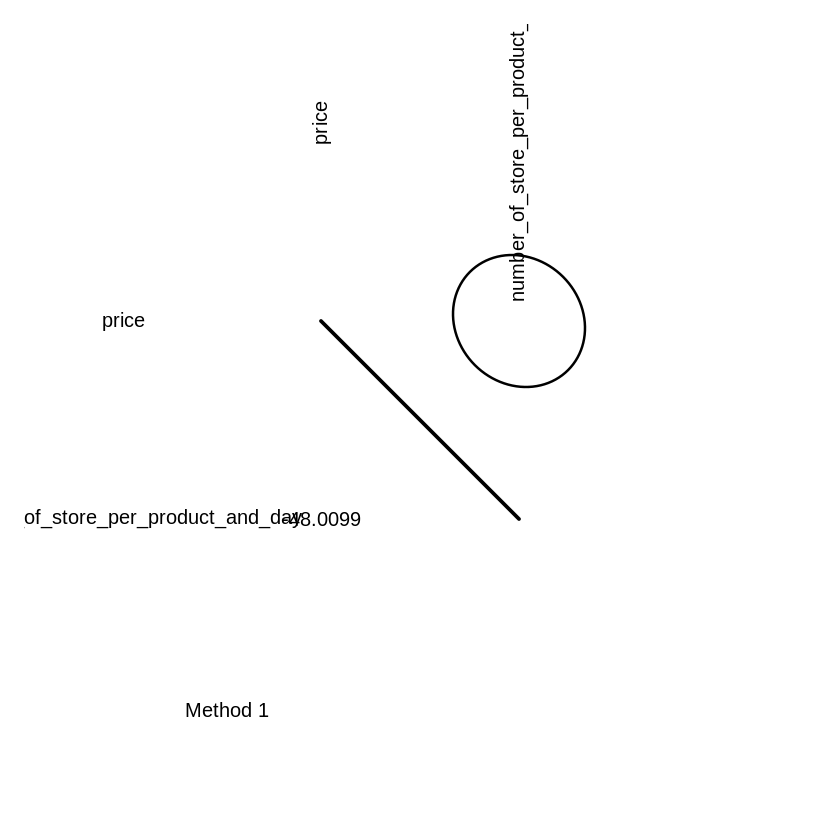

In [ ]:
plotcov(Sx1)

Let's explore the first 100 MD data while rounding it up to 2 decimals

In [ ]:
#head(MD)

[1] 1.4634305 0.6021631 0.1949387 5.0020975 1.4634305 1.9123818

In [ ]:
MD[1:300] %>% round(2)

[1] 0.49 0.49 0.48 0.48 0.48 0.48 0.48 0.48 0.47 2.49 2.49 2.49 2.49 2.45 2.45
 [16] 2.46 2.46 2.46 2.46 2.38 2.38 2.38 2.38 2.38 2.38 2.38 2.38 2.38 2.38 2.38
 [31] 2.38 2.40 2.40 2.40 2.40 2.40 2.40 2.41 2.41 2.39 2.39 2.39 2.39 2.39 2.39
 [46] 2.39 2.39 2.38 2.38 2.38 2.38 2.38 2.38 2.38 2.39 2.38 2.38 2.38 2.38 2.38
 [61] 2.38 2.38 2.39 2.35 2.35 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 [76] 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 [91] 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
[106] 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
[121] 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.42 0.42
[136] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[151] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[166] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[181] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[196] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[211] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[226] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[241] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[256] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[271] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42
[286] 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42

In [ ]:
xbox360_911420_sub$MD <- round(MD,3)

In [ ]:
xbox360_911420_sub_MD = xbox360_911420_sub

In [ ]:
head(xbox360_911420_sub_MD,3)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,count_product_by_store,MD
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
911420,2016-12-23,Xbox 360,231,Friday,51,20443,2016,Dec,231.0361,5.442574,15,10152,64,24,0.489
911420,2016-12-24,Xbox 360,231,Saturday,51,20443,2016,Dec,231.0361,5.442574,15,10152,64,24,0.489
911420,2016-12-25,Xbox 360,229,Sunday,51,20443,2016,Dec,229.0358,5.433878,15,10152,64,24,0.478


We now want to flag outliers (price data points), and for that we need to get a sense of the data distribution of MDs in order to know what could be a reasonable threashold. Let's then do quick plots.

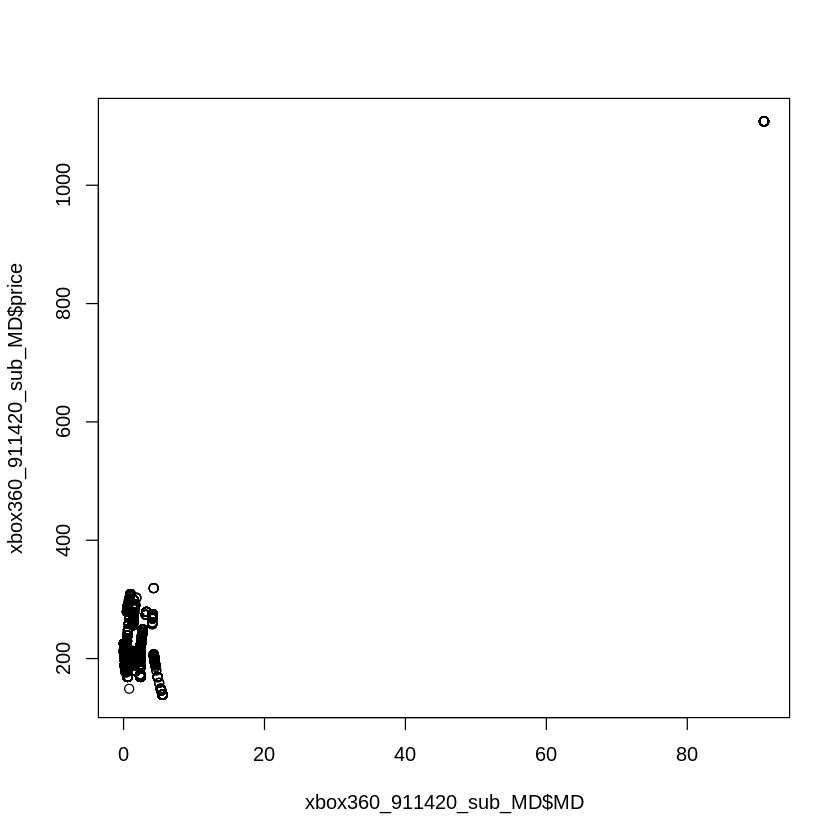

In [ ]:
plot(xbox360_911420_sub_MD$MD, xbox360_911420_sub_MD$price)

In [ ]:
# Let's create a new column where outliers will be flagged
# called outlier_MD
sub_xbox360$outlier_MD <- FALSE
sub_xbox360$outlier_MD[sub_xbox360$MD > 50] <- TRUE

In [ ]:
# Let's create a new column where outliers will be flagged
# called outlier_MD
xbox360_911420_sub_MD$outlier_MD <- FALSE
xbox360_911420_sub_MD$outlier_MD[xbox360_911420_sub_MD$MD > 50] <- TRUE

In [ ]:
tail(sub_xbox360)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,MD,outlier_MD
<int>,<date>,<chr>,<int>,<chr>,<int>,<fct>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<lgl>
3096808,2016-04-06,Xbox 360,849,Wednesday,14,428,2016,Apr,860.0012,6.756934,8,4640,64,10.372,FALSE
2010167,2016-01-22,Xbox 360,309,Friday,3,12377,2016,Jan,315.5129,5.754200,4,3196,64,0.115,FALSE
2678994,2015-01-28,Xbox 360,599,Wednesday,5,578,2015,Jan,616.3098,6.423750,4,5400,64,3.237,FALSE
1263856,2015-04-24,Xbox 360,249,Friday,17,13676,2015,Apr,254.2239,5.538216,3,3729,64,0.948,FALSE
3169815,2016-08-17,Xbox 360,249,Wednesday,33,428,2016,Aug,251.6365,5.527986,6,3330,64,0.197,FALSE
676491,2015-01-24,Xbox 360,399,Saturday,4,112,2015,Jan,410.5302,6.017450,4,7035,64,0.910,FALSE


In [ ]:
xbox360_911420_sub_MD0 = xbox360_911420_sub_MD

tail(xbox360_911420_sub_MD0)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,count_product_by_store,MD,outlier_MD
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
911420,2017-02-20,Xbox 360,199,Monday,8,1595,2017,Feb,199,5.293305,23,10152,64,24,2.35,FALSE
911420,2017-02-21,Xbox 360,199,Tuesday,8,1595,2017,Feb,199,5.293305,23,10152,64,24,2.35,FALSE
911420,2017-02-22,Xbox 360,199,Wednesday,8,1595,2017,Feb,199,5.293305,23,10152,64,24,2.35,FALSE
911420,2017-02-23,Xbox 360,199,Thursday,8,1595,2017,Feb,199,5.293305,23,10152,64,24,2.35,FALSE
911420,2017-02-24,Xbox 360,199,Friday,8,1595,2017,Feb,199,5.293305,24,10152,64,24,2.35,FALSE
911420,2017-02-25,Xbox 360,199,Saturday,8,1595,2017,Feb,199,5.293305,24,10152,64,24,2.35,FALSE


In [ ]:
tail(xboxb360_911420_sub_MD0,3)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,count_product_by_store,MD,outlier_MD
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
911420,2017-02-23,Xbox 360,199,Thursday,8,1595,2017,Feb,199,5.293305,23,10152,64,24,2.35,FALSE
911420,2017-02-24,Xbox 360,199,Friday,8,1595,2017,Feb,199,5.293305,24,10152,64,24,2.35,FALSE
911420,2017-02-25,Xbox 360,199,Saturday,8,1595,2017,Feb,199,5.293305,24,10152,64,24,2.35,FALSE


In [ ]:
# order in the MD column in ascending order
xboxb360_911420_sub_MD0 = xboxb360_911420_sub_MD0[order(xboxb360_911420_sub_MD0$MD, decreasing = FALSE),]  

In [ ]:
# display the points with highest MD (90.888)
# thus outliers
tail(xboxb360_911420_sub_MD0,3)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,count_product_by_store,MD,outlier_MD
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
911420,2013-08-27,Xbox 360,1108,Tuesday,35,1260,2013,Aug,1128.794,7.028905,4,10152,64,24,90.888,TRUE
911420,2013-08-28,Xbox 360,1108,Wednesday,35,1260,2013,Aug,1128.794,7.028905,4,10152,64,24,90.888,TRUE
911420,2013-08-29,Xbox 360,1108,Thursday,35,1260,2013,Aug,1128.794,7.028905,4,10152,64,24,90.888,TRUE


In [ ]:
dim(xboxb360_911420_sub_MD0)

[1] 10152    17

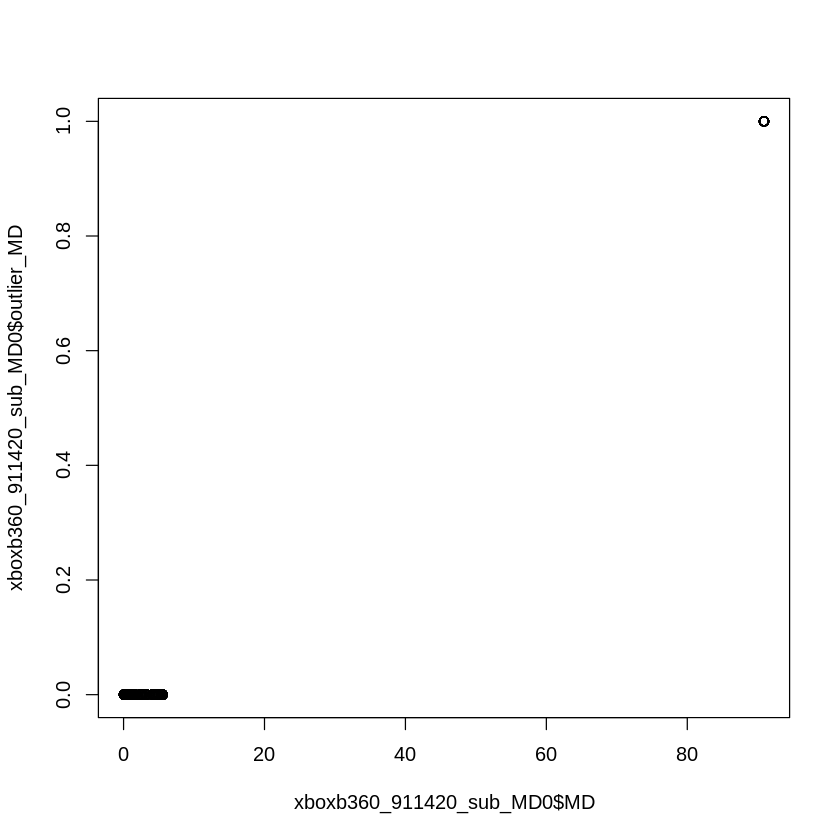

In [ ]:
plot(xboxb360_911420_sub_MD0$MD, xboxb360_911420_sub_MD0$outlier_MD)

Warning message:
“Ignoring unknown parameters: outlier.colour, outlier.shape”


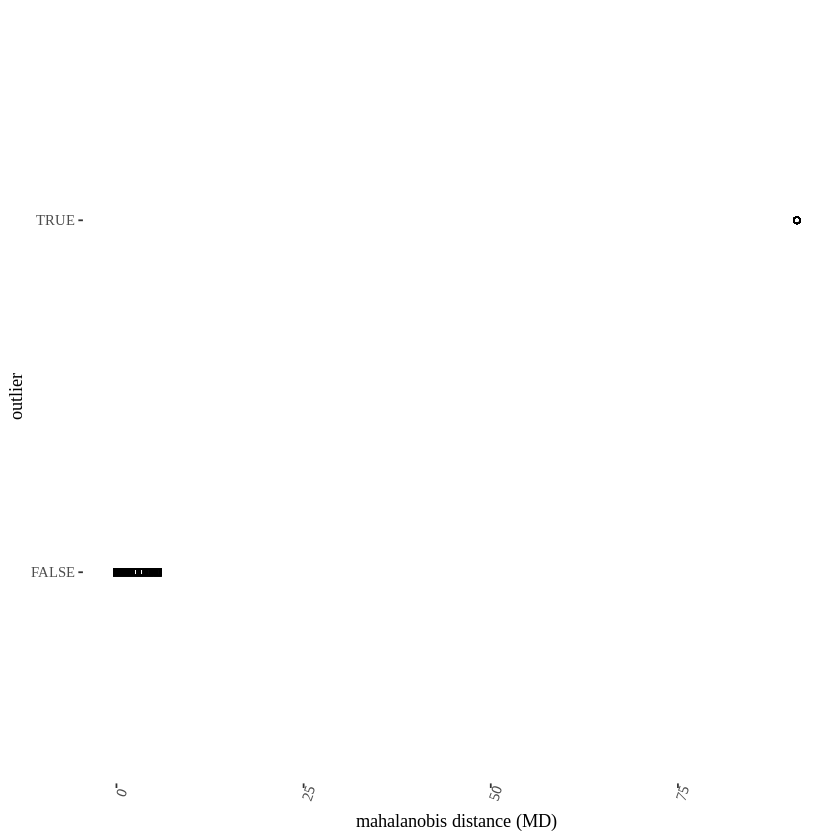

In [ ]:
md_plot <- ggplot(xboxb360_911420_sub_MD0, aes(MD, outlier_MD), colour = MD)

md_plot + geom_point(outlier.colour = "red", outlier.shape = 1, shape = xboxb360_911420_sub_MD0$outlier_MD) +
theme_tufte() +
theme(axis.text.x = element_text(angle = 70)) +
labs(x = "mahalanobis distance (MD)", y = "outlier") +
#xlab("mahalanobis distance (MD)") + ylab("outlier") +
ggsave("md_plot.png",width=6, height=4,dpi=300)

In [ ]:
xboxb360_911420_sub_MD0$MD <- as.numeric(xboxb360_911420_sub_MD0$MD)

In [ ]:
md_plot1 <- ggplot(xboxb360_911420_sub_MD0, aes(MD, outlier_MD, size = MD, colour = MD))

md_plot1 + geom_point(alpha=0.2) + 
theme_tufte() +
#scale_fill_gradient("MD", low = "green", high = "red") +
#scale_colour_gradient2() +
scale_colour_viridis_c(option = "plasma") +
scale_size(range = c(1, 5))  +
scale_x_continuous(limits = c(0, 125)) + # Show dots
  geom_label(
    label=rownames(xboxb360_911420_sub_MD0$), 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T
  )
#geom_text(aes(label = outlier_MD), hjust = -0.5, , size = 3)
#ggsave("md_plot1.png",width=6, height=4,dpi=300)


ERROR: ignored

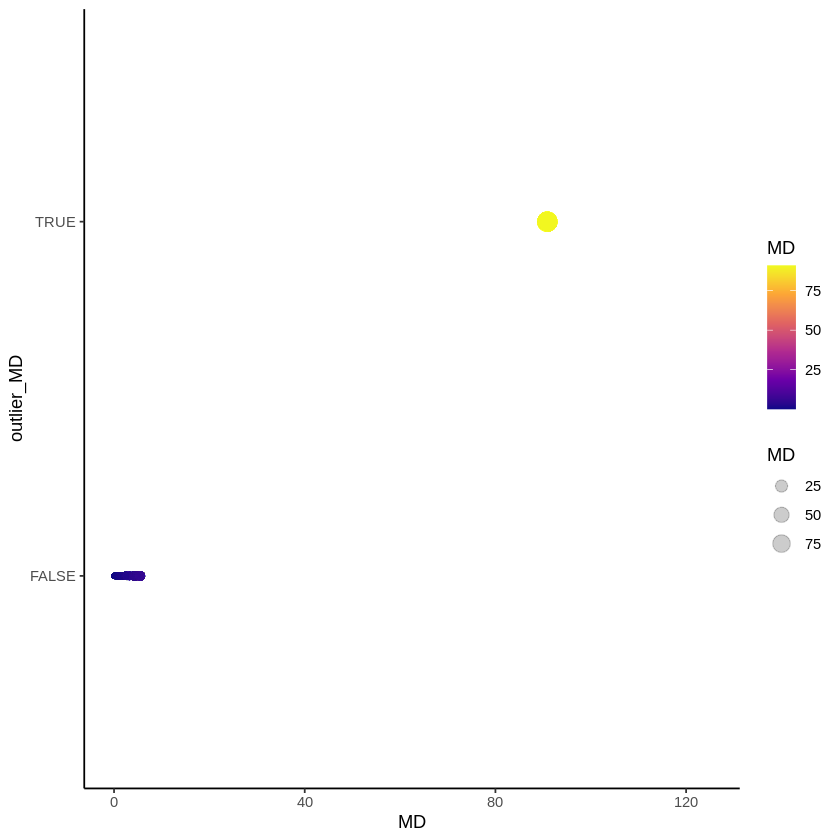

In [ ]:
md_plot1 <- ggplot(xboxb360_911420_sub_MD0, aes(MD, outlier_MD, size = MD, colour = MD))

md_plot1 + geom_point(alpha=0.2) + 
theme_classic() +
#scale_fill_gradient("MD", low = "green", high = "red") +
#scale_colour_gradient2() +
scale_colour_viridis_c(option = "plasma") +
scale_size(range = c(1, 5))  +
scale_x_continuous(limits = c(0, 125))
#geom_text(aes(label = outlier_MD), hjust = -0.5, , size = 3)
#ggsave("md_plot1.png",width=6, height=4,dpi=300)


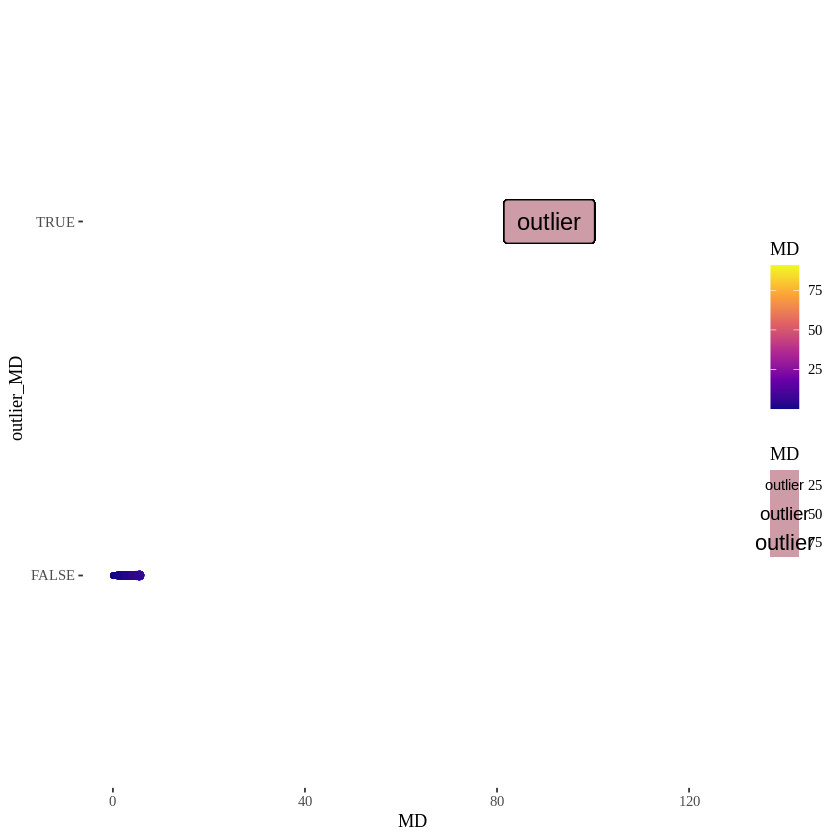

In [ ]:
md_plot11 <- ggplot(xboxb360_911420_sub_MD0, aes(MD, outlier_MD, size = MD, colour = MD))

md_plot11 + geom_point(alpha=0.2) + 
theme_tufte() +
#scale_fill_gradient("MD", low = "green", high = "red") +
#scale_colour_gradient2() +
scale_colour_viridis_c(option = "plasma") +
scale_size(range = c(1, 5))  +
scale_x_continuous(limits = c(0, 125)) + # Show dots
  geom_label(
    label="outlier", 
    x=90.888,
    y="TRUE",
    label.padding = unit(0.55, "lines"), # Rectangle size around label
    label.size = 0.35,
    color = "black",
    fill="#cd9ca7"
  )
#geom_text(aes(label = outlier_MD), hjust = -0.5, , size = 3)
#ggsave("md_plot1.png",width=6, height=4,dpi=300)



Identify the products that are outliers

In [ ]:
df_outliers <- sub_xbox360 %>% group_by(price) %>% filter(outlier_MD == "TRUE")

In [ ]:
df_outliers_MD <- xbox360_911420_sub_MD %>% group_by(price) %>% filter(outlier_MD == "TRUE")

In [ ]:
dim(df_outliers_MD)

[1] 97 17

In [ ]:
head(df_outliers_MD)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,count_product_by_store,MD,outlier_MD
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
911420,2013-05-25,Xbox 360,1108,Saturday,21,1260,2013,May,1126.282,7.026678,3,10152,64,24,90.888,TRUE
911420,2013-05-26,Xbox 360,1108,Sunday,21,1260,2013,May,1126.282,7.026678,3,10152,64,24,90.888,TRUE
911420,2013-05-27,Xbox 360,1108,Monday,22,1260,2013,May,1126.282,7.026678,3,10152,64,24,90.888,TRUE
911420,2013-05-28,Xbox 360,1108,Tuesday,22,1260,2013,May,1126.282,7.026678,4,10152,64,24,90.888,TRUE
911420,2013-05-29,Xbox 360,1108,Wednesday,22,1260,2013,May,1126.282,7.026678,4,10152,64,24,90.888,TRUE
911420,2013-05-30,Xbox 360,1108,Thursday,22,1260,2013,May,1126.282,7.026678,4,10152,64,24,90.888,TRUE


In [ ]:
dim(df_outliers)

[1] 10 16

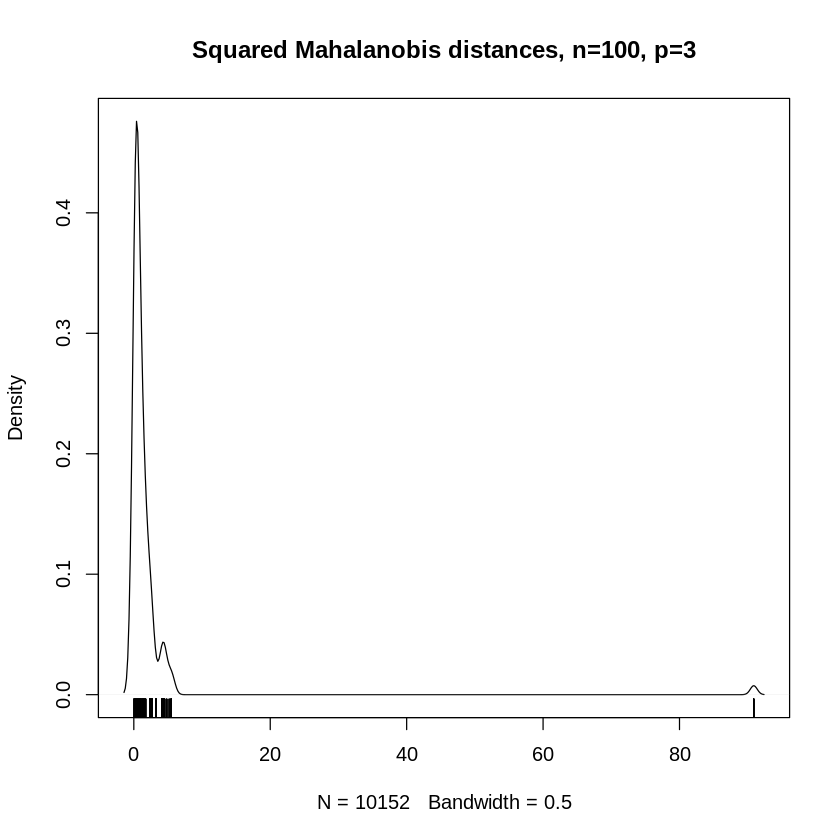

In [ ]:
plot(density(MD, bw = 0.5),
     main="Squared Mahalanobis distances, n=100, p=3") ; rug(MD)


In [ ]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




In [ ]:
# ggplot dendogram
dg <- ggplot(distance, aes(distance))

dg + theme_classic()

ERROR: ignored

### K-Means clustering

[source](https://uc-r.github.io/kmeans_clustering)

In [ ]:
#sub_xbox360_clean <- na.omit(sub_xbox360)

This error occurs also due to non numeric values present in the table. Kmeans cannot handle data that has NA or NAN values, which is the case in our data frame. The mean and variance are then no longer well defined, and we don't know anymore which center is closest.<br>

A work around could be to focus only on the numerical variables.

In [ ]:
# 
k2 <- kmeans(na.omit(xbox360_911420_sub_2014),4) # into 3 cluster

str(k2)

Warning message in storage.mode(x) <- "double":
“NAs introduced by coercion”


ERROR: ignored

In [ ]:
print(k2)

K-means clustering with 3 clusters of sizes 45799, 26976, 9745

Cluster means:
      [,1]
1 186.2243
2 388.9364
3 648.9522

Clustering vector:
    [1] 2 2 2 3 3 1 2 1 1 2 2 1 2 2 1 1 1 3 2 2 1 1 1 3 1 1 1 1 1 1 2 1 1 3 2 1
   [37] 1 1 2 1 2 3 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2
   [73] 2 1 1 2 1 2 1 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1 1 2 2 1 3 3 2 1 1 3 1
  [109] 1 3 2 1 1 1 1 1 1 3 1 2 2 1 1 1 2 1 3 1 1 1 1 1 3 1 1 1 3 1 2 3 2 1 1 1
  [145] 1 1 3 3 1 1 1 2 1 1 3 3 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1
  [181] 1 1 1 1 3 1 1 1 1 1 2 2 2 1 2 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 3 1 1
  [217] 3 1 2 1 2 1 1 1 3 1 2 2 1 1 3 2 2 2 3 1 1 1 1 1 3 3 1 3 1 1 3 2 1 1 2 1
  [253] 2 3 1 1 1 2 3 1 3 1 3 1 2 1 1 1 1 1 2 1 1 1 1 2 1 3 1 3 2 2 1 3 1 1 1 2
  [289] 1 2 3 3 1 2 2 2 2 1 2 2 1 1 2 1 2 2 1 2 2 2 1 1 2 1 1 1 3 2 1 1 3 1 1 2
  [325] 1 2 2 2 2 2 2 2 1 2 1 1 1 1 1 3 3 1 2 1 1 1 1 1 1 1 3 1 2 1 1 2 1 3 1 1
  [361] 2 1 1 3 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 3 3 1 2 2

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.84 loaded



In [ ]:
num.col <- sapply(sub_xbox360, is.numeric)

In [ ]:
tail(num.col,3)

number_of_store_per_product_and_day              total_days_for_product 
                               TRUE                                TRUE 
         total_products_in_category 
                               TRUE

In [ ]:
cor.data <- cor(sub_xbox360[, num.col])

ERROR: ignored

In [ ]:
#fviz_cluster(k2, data = sub_xbox360)

**Elbow method**
[source](https://uc-r.github.io/kmeans_clustering)

In [ ]:
# Determine and plot the optimal number of clusters

# function to compute total within-cluster sum of square 
wss <- (nrow(xbox360_911420_sub)-1)*sum(apply(xbox360_911420_sub,2,var))

# Compute and plot wss for k = 1 to k = 15
# extract wss for 2-15 clusters
for (i in 2:15) wss[i] <- sum(kmeans(xbox360_911420_sub,
   centers=i)$withinss)

plot(1:15, wss, type="b", xlab="Number of Clusters K",
  frame = FALSE, ylab="Within-clusters sum of squares")

Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in storage.mode(x) <- "double":
“NAs introduced by coercion”


ERROR: ignored

In [ ]:
# K-Means Cluster Analysis
fit <- kmeans(xbox360_911420_sub$price, 5) # 5 cluster solution
# get cluster means
aggregate(xbox360_911420_sub$price,by=list(fit$cluster),FUN=mean)
# append cluster assignment
xbox360_911420_sub$price <- data.frame(xbox360_911420_sub$price, fit$cluster)

Group.1,x
<int>,<dbl>
1,274.5092
2,188.0031
3,1108.0000
4,171.7117
5,206.9420


ERROR: ignored

In [ ]:
tail(xbox360_911420_sub, 3)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category,count_product_by_store
<int>,<date>,<chr>,<int>,<chr>,<int>,<fct>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
911420,2017-02-23,Xbox 360,199,Thursday,8,1595,2017,Feb,199,5.293305,23,10152,64,24
911420,2017-02-24,Xbox 360,199,Friday,8,1595,2017,Feb,199,5.293305,24,10152,64,24
911420,2017-02-25,Xbox 360,199,Saturday,8,1595,2017,Feb,199,5.293305,24,10152,64,24


In [ ]:
dim(sub_xbox360)

[1] 82520    14

In [ ]:
kcl <- ggplot(xbox360_911420_sub, aes(xbox360_911420_sub.price, fit.cluster))


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'xbox360_911420_sub.price' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.defau

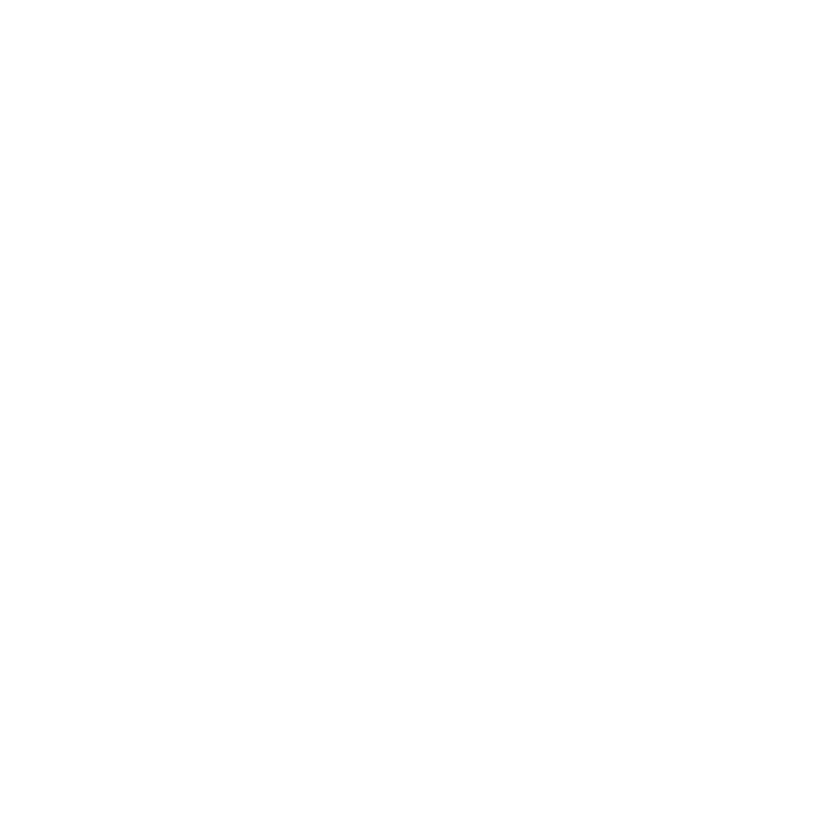

In [ ]:
kcl + geom_path(lineend = "butt", linejoin = "round", linemitre = 1)

#kcl + geom_count()

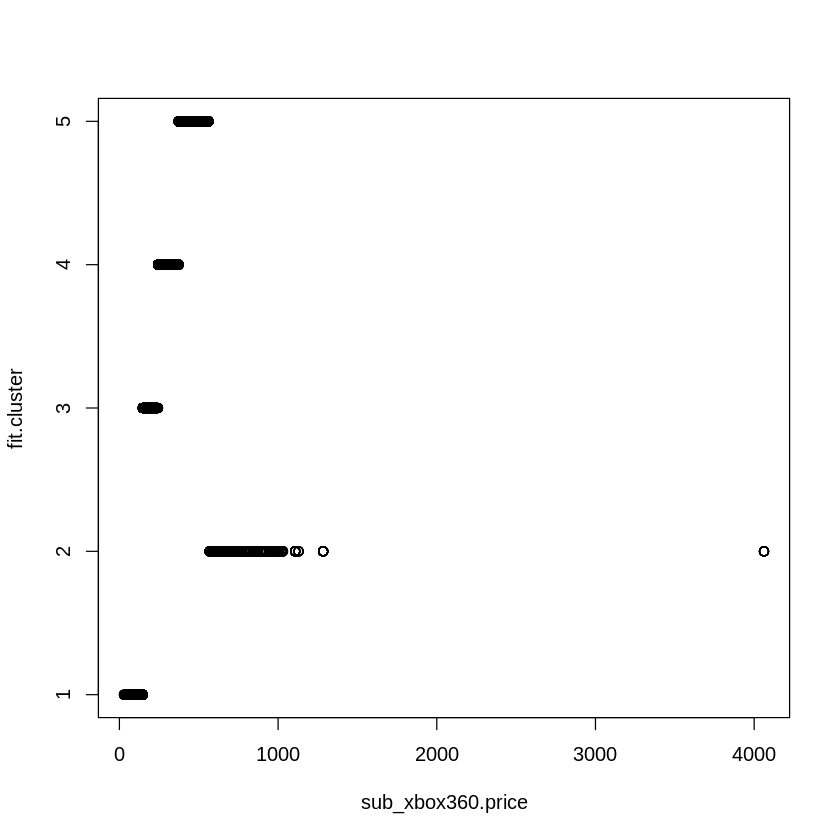

In [ ]:
plot(sub_xbox360)


In [ ]:
sub_xbox360 %>%
  mutate(Cluster = k2$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

ERROR: ignored

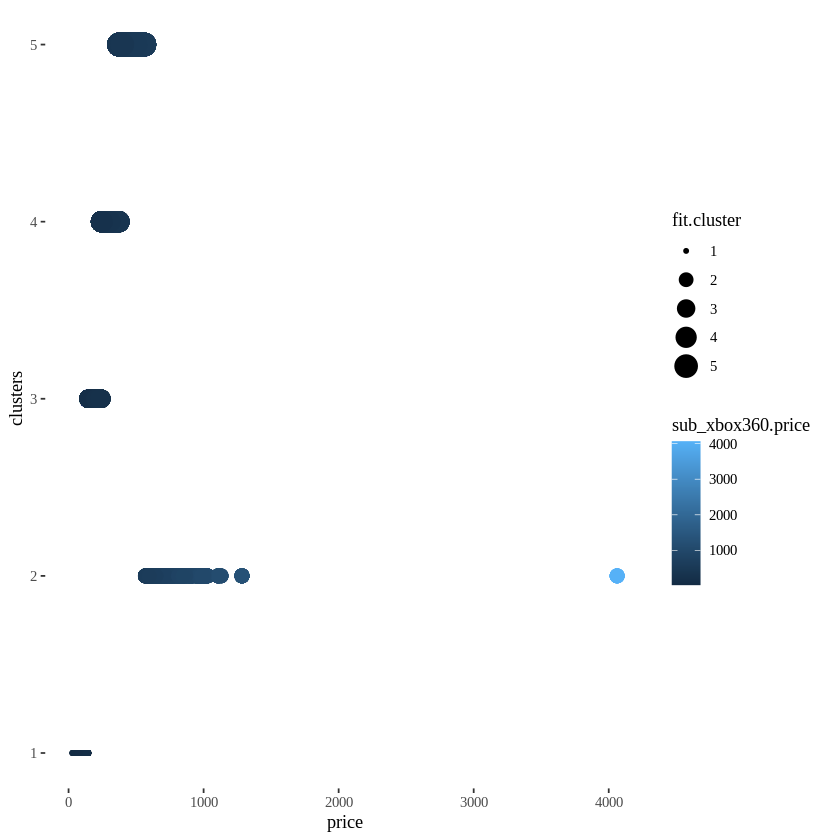

In [ ]:
kcl +
  geom_point(mapping = aes(x = sub_xbox360.price, y = fit.cluster, size = fit.cluster, colour = sub_xbox360.price)) +
  #scale_y_continuous(limits = c(0, 1500)) +
  #facet_wrap(~month) +
  scale_fill_gradient("Count", low = "grey", high = "blue")+
  theme_tufte() +
  xlab("price") +
  ylab("clusters") +
  #theme(axis.text.x = element_text(angle = 70)) +
  ggsave("k-cluster.png",width=6, height=4,dpi=300)

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.

ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (82520): x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepar

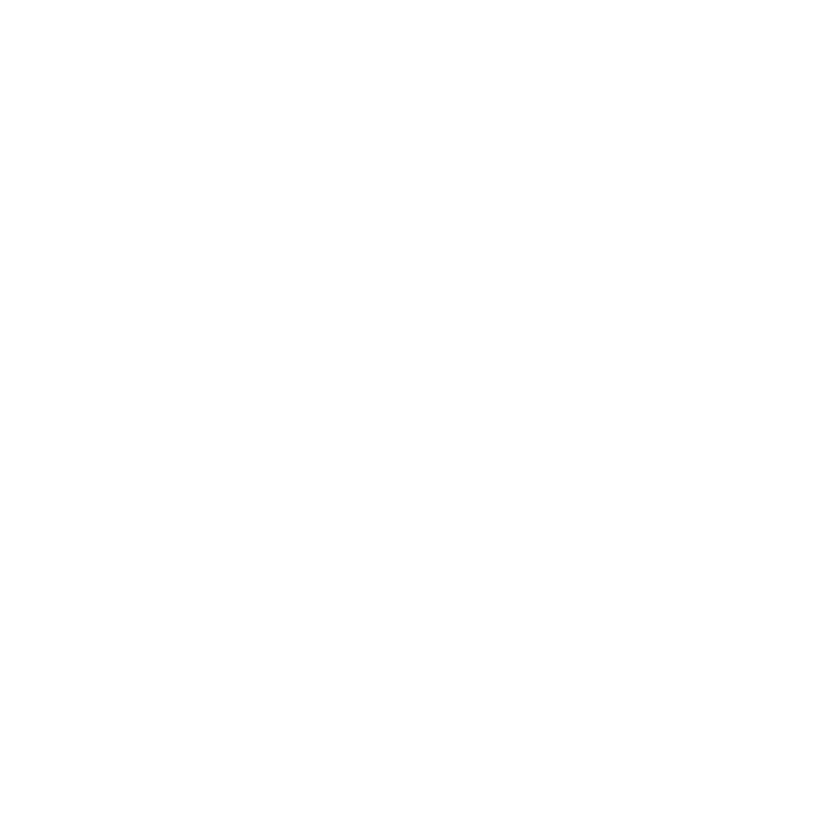

In [ ]:
kcl + geom_bar()

4. Apply K-Means (feed the results from PCA to model)

5. Append column clusters to original df

6. Append a column has_ikea to original df

7. Explore clusters - you will probably find them separated into small medium and large municipalities

8. Analyse based on for example: population, sales index, revenue.. exclude where ikea already exists, close to existing ikea

9. Suggest top 3 candidates to open new ikea store.